
## Libtorch Source code.

```python
git clone https://github.com/pytorch/pytorch.git
git submodule update --init --recursive

cd pytorch
# On Linux:
python setup.py build
# On macOS (may need to prefix with `MACOSX_DEPLOYMENT_TARGET=10.9 CC=clang CXX=clang++` when using anaconda)
LDSHARED="cc -dynamiclib -undefined dynamic_lookup" python setup.py build

cd ..; mkdir -p build; cd build
cmake .. -DPYTHON_EXECUTABLE:FILEPATH=$(which python)  # helpful if you use anaconda
make -j
```


## Tensors:

In mathematics, a tensor is a geometric object that maps in a multi-linear manner geometric vectors, scalars, and other tensors to a resulting tensor. Vectors and scalars which are often used in elementary physics and engineering applications, are considered as the simplest tensors. Vectors from the dual space of the vector space, which supplies the geometric vectors, are also included as tensors.[1] Geometric in this context is chiefly meant to emphasize independence of any selection of a coordinate system.[more](https://en.wikipedia.org/wiki/Tensor)

In simple terms, **Tensor** is an arrangment of numbers in different dimentions. For example
<br>
- Vectors/Arrays are 1D-Tensor.
- Matrix with rows and coulmns are 2D-Tensor.
- RGB image is an example of 3D-Tensor.  

Similarly we can have 4D-Tensor, 5D-Tensor ..... N-D-Tensor etc.

Throught the rest of our discussion we will see how we can use **Pytorch's python and C++ frontend** to create these **Tensors** and how we can playaround and work with Pythorch API's to implement a simple Neural net to most complicated ones.

## Tensor creation using Pytorch 

### using Python frontend:


```python
# First, import PyTorch
import torch

### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
print(features)

############# OUTPUT #################

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])

```

### using C++ frontend:
```cpp
#include <torch/torch.h>
#include <ATen/Context.h>
#include <iostream>

int main()
{
  // Seed for Random number
  torch::manual_seed(9);
  torch::Tensor features = torch::rand({1, 5});
  std::cout << "features = " << features << "\n";
}

################ OUTPUT #######################

features =  0.6558  0.3020  0.4799  0.7774  0.9180
[ Variable[CPUFloatType]{1,5} ]

```

As we can see we include the headerfiles which is similar to importing a module in python.  
**NOTE**: We are using similar API's **manual_seed() and rand()** to generate the Tensor. This is a pattern which we will see and can be used as and advantage to convert our python code to c++ or viceversa.

## Get the Shape of Tensor

### Using Python:

Pytoch syntax is pretty similar to Numpy.

```python
print(features.shape)
print(features.shape[0])
print(features.shape[1])

############# OUTPUT #################

torch.Size([1, 5])
1
5

```

### Using C++:

```cpp
#include <torch/torch.h>
#include <ATen/Context.h>
#include <iostream>

int main()
{
  // Seed for Random number
  torch::manual_seed(9);
  torch::Tensor features = torch::rand({1, 5});
  std::cout << "features shape = " << features.sizes() << "\n";
  std::cout << "features shape rows = " << features.sizes()[0] << "\n";
  std::cout << "features shape col = " << features.size(1) << "\n";

}

################ OUTPUT #######################

features shape = [1, 5]
features shape rows = 1
features shape col = 5

```

Notice the different ways/methods of accessing the indexes of a Tensors.
```cpp
  // Numpy like indexing style.
  std::cout << "features shape rows = " << features.sizes()[0] << "\n";
  // C++ way of accessing the indexes.
  std::cout << "features shape col = " << features.size(1) << "\n";
```

In the rest of the of the discussion, we use the below version as our choice to access the shape of a **Tensor**.
```cpp
  std::cout << "features shape col = " << features.size(1) << "\n";
```




## Simple Neural Net.

Let us create a simple Neual Net from scratch using Pytorch. 

![](assets/simple_neuron.png)

Mathematically this looks like: 

$$
\Large
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

The above mathemetical formula for $h$ can also be written in matrix form as follows.

$$
\Large
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

### Using Python:

In [1]:
# First, import PyTorch
import torch

In [2]:
def ActivationFunction(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [3]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [4]:
print(features.shape)
print(features.shape[0])
print(features.shape[1])

torch.Size([1, 5])
1
5


In [5]:
y = ActivationFunction(torch.sum(features * weights) + bias)
features.shape, weights.shape, bias.shape, y

(torch.Size([1, 5]),
 torch.Size([1, 5]),
 torch.Size([1, 1]),
 tensor([[0.1595]]))

In [6]:
y = ActivationFunction((features*weights).sum() + bias)
features.shape, weights.shape, bias.shape, y

(torch.Size([1, 5]),
 torch.Size([1, 5]),
 torch.Size([1, 1]),
 tensor([[0.1595]]))

In [7]:
y = ActivationFunction(torch.mm(features,weights.view(5,1)) + bias)
y

tensor([[0.1595]])

### Using C++:

```cpp
#include <torch/torch.h>
#include <ATen/Context.h>
#include <iostream>

torch::Tensor ActivationFunction(const torch::Tensor &x)
{
  // Sigmoid function.
  auto retVal = 1/(1+torch::exp(-x));
  return retVal;
}

int main()
{
  // Seed for Random number
  torch::manual_seed(9);
  //at::manual_seed(9);

  torch::Tensor features = torch::rand({1, 5});
  std::cout << "features = " << features << "\n";

  auto weights = torch::randn_like(features);
  std::cout << "weights = " << weights << "\n";

  auto bias = torch::randn({1,1});
  std::cout << "bias  =" << bias << "\n";

  // There are multiple ways to get the same result. Here are the few of them.
  // 1st way
  auto y = ActivationFunction(torch::sum(features * weights) +bias);
  std::cout << "y using (\"torch::sum()\") = " << y << "\n";

  // 2nd way
  y = ActivationFunction((features * weights).sum() +bias);
  std::cout << "y using (\".sum()\") = " << y << "\n";

  // 3rd and preferred way. Using Matrix multiplication.
  y = ActivationFunction(torch::mm(features, weights.view({5,1}))+bias);
  std::cout << "y using (\"torch::mm().view()\") = " << y << "\n";

  // Reshaping the tensor using reshape().
  y = ActivationFunction(torch::mm(features, weights.reshape({5,1}))+bias);
  std::cout << "y using (\"torch.mm().reshape() \") = " << y << "\n";

  // Reshaping the tensor using inplace resize_().
  y = ActivationFunction(torch::mm(features, weights.resize_({5,1}))+bias);
  std::cout << "y using (\"torch.mm().resize_() \") = " << y << "\n";

  std::cout << "features shape = " << features.sizes() << "\n";
  std::cout << "features shape rows = " << features.sizes()[0] << "\n";
  std::cout << "features shape col = " << features.size(1) << "\n";
  
  return 0;
}


################ OUTPUT #######################

features =  0.6558  0.3020  0.4799  0.7774  0.9180
[ Variable[CPUFloatType]{1,5} ]
    
weights = -1.3316  0.4487 -0.2635  1.2342 -1.1583
[ Variable[CPUFloatType]{1,5} ]
    
bias  =-1.7026
[ Variable[CPUFloatType]{1,1} ]
    
y using ("torch::sum()") = 0.01 * 6.4732
[ Variable[CPUFloatType]{1,1} ]
    
y using (".sum()") = 0.01 * 6.4732
[ Variable[CPUFloatType]{1,1} ]
    
y using ("torch::mm().view()") = 0.01 * 6.4732
[ Variable[CPUFloatType]{1,1} ]
    
y using ("torch.mm().reshape() ") = 0.01 * 6.4732
[ Variable[CPUFloatType]{1,1} ]
    
y using ("torch.mm().resize_() ") = 0.01 * 6.4732
[ Variable[CPUFloatType]{1,1} ]
    
features shape = [1, 5]
features shape rows = 1
features shape col = 5


```

## Stacked Neural Net.
![image](./assets/multilayer_diagram_weights.png)

In [8]:
### Generate some data
torch.manual_seed(9) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [9]:
h = ActivationFunction(torch.mm(features, W1) +B1)
y = ActivationFunction(torch.mm(h, W2) + B2)
y

tensor([[0.4684]])

### Using C++
```cpp
#include <torch/torch.h>
#include <ATen/Context.h>
#include <iostream>

torch::Tensor ActivationFunction(const torch::Tensor &x)
{
  // Sigmoid function.
  auto retVal = 1/(1+torch::exp(-x));
  return retVal;
}


int main()
{
  // Seed for Random number
  torch::manual_seed(9);

  torch::Tensor features = torch::rand({1, 3});
  //auto features = torch::rand({1, 3});
  std::cout << "features = " << features << "\n";

  // Define the size of each layer in our network
  // Number of input units, must match number of input features
  auto num_inputs = features.size(1);
  // Number of hidden units
  int num_hidden_layers = 2;
  // Number of output units
  int num_output = 1;


  // Weights for inputs to hidden layer
  auto W1 = torch::randn({num_inputs, num_hidden_layers});
  std::cout << "W1 = " << W1.sizes() << "\n";
  // Weights for hidden layer to output layer
  auto W2 = torch::randn({num_hidden_layers, num_output});
  std::cout << "W2 = " << W2.sizes() << "\n";

  // and bias terms for hidden and output layers
  auto B1 = torch::randn({1, num_hidden_layers});
  std::cout << "B1 = " << B1.sizes() << "\n";
  auto B2 = torch::randn({1, num_output});
  std::cout << "B2 = " << B2.sizes() << "\n";


  auto h = ActivationFunction(torch::mm(features, W1) + B1);
  auto y = ActivationFunction(torch::mm(h, W2) + B2);
  std::cout << "y = " << y << "\n";
  return 0;
}

################ OUTPUT #######################

features =  0.6558  0.3020  0.4799
[ Variable[CPUFloatType]{1,3} ]
W1 = [3, 2]
W2 = [2, 1]
B1 = [1, 2]
B2 = [1, 1]
y =  0.6860
[ Variable[CPUFloatType]{1,1} ]

```

### MNIST

Download the mnist data using the [script](https://gist.github.com/goldsborough/6dd52a5e01ed73a642c1e772084bcd03)
```
 sudo mkdir -p /opt/MNIST
 sudo python download_mnist.py -d /opt/MNIST/
```

In [10]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [11]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


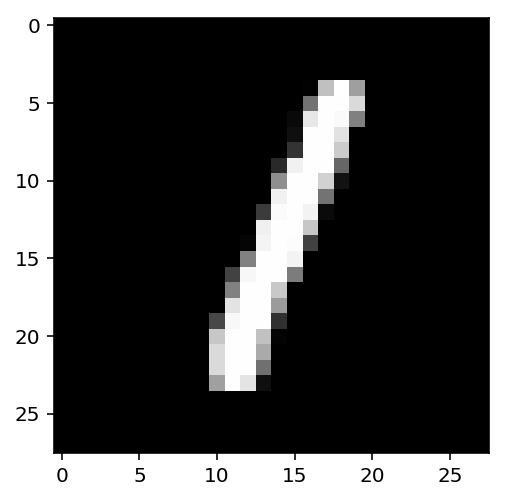

In [13]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [14]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [15]:
inputs.shape

torch.Size([64, 784])

In [16]:
## Solution
def SoftMax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = SoftMax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1).shape)

torch.Size([64, 10])
torch.Size([64])


## C++

```cpp
#include <torch/torch.h>
#include <ATen/Context.h>
#include <iostream>

torch::Tensor ActivationFunction(const torch::Tensor &x)
{
  // Sigmoid function.
  auto retVal = 1/(1+torch::exp(-x));
  return retVal;
}

torch::Tensor SoftMax(const torch::Tensor &x)
{
  auto sum = torch::sum(torch::exp(x),1);
  return torch::exp(x)/sum.view({-1, 1});
}

int main()
{

  // Download the MNIST data using the script present in,
  // ../scripts/download_mnist.py
  // Create a data loader for the MNIST dataset.
  auto trainLoader = torch::data::make_data_loader(
      torch::data::datasets::MNIST("/opt/MNIST/").map(
        torch::data::transforms::Stack<>()),
      /*batch_size=*/64);

  auto batch = std::begin(*trainLoader);

  auto images = batch->data;
  auto target = batch->target;
  std::cout << "images = " << images.sizes() << "\n";
  std::cout << "targets = " << target.sizes() << "\n";

  // Seed for Random number
  torch::manual_seed(9);

  auto inputs = images.view({images.size(0),-1});
  std::cout << "inputs = " << inputs.sizes() << "\n";


  // Create parameters
  auto w1 = torch::randn({784, 256});
  std::cout << "w1 =" << w1.sizes() << "\n";
  auto b1 = torch::randn({256});
  std::cout << "b1 =" << b1.sizes() << "\n";

  auto w2 = torch::randn({256, 10});
  std::cout << "w2 =" << w2.sizes() << "\n";
  auto b2 = torch::randn({10});
  auto b2 = torch::randn({10});
  std::cout << "b2 =" << b2.sizes() << "\n";

  auto h = ActivationFunction(torch::mm(inputs, w1) + b1);
  std::cout << "h =" << h.sizes() << "\n";
  auto out = torch::mm(h, w2) + b2;
  std::cout << "out =" << out.sizes() << "\n";
  //std::cout << "out =" << out << "\n"; 

  auto pred = SoftMax(out);

  std::cout << "pred = " << pred.sizes() << "\n";
  //  std::cout << "pred = " << pred << "\n";

  auto predSum = torch::sum(pred, 1);
  std::cout << "predsum shape = " << predSum.sizes() << "\n";
  //std::cout << "predsum = " << predSum << "\n";
  return 0;
}

##################### OUTPUT ########################

images = [64, 1, 28, 28]
targets = [64]
inputs = [64, 784]
w1 =[784, 256]
b1 =[256]
w2 =[256, 10]
b2 =[10]
h =[64, 256]
out =[64, 10]
pred = [64, 10]
predsum shape = [64]


```

## Complete Mnist Example 
### Python

In [31]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [30]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9066940238480883
Training loss: 0.8177144474058009
Training loss: 0.5046289031153549
Training loss: 0.41867202615687077
Training loss: 0.37943710804557496


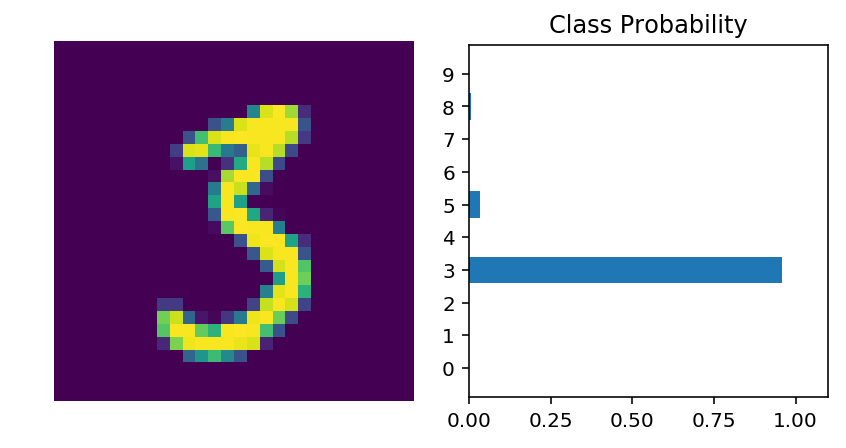

In [34]:
%matplotlib inline
import helper


testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

### C++
```cpp
#include <torch/torch.h>
#include <iostream>

struct ReLu: torch::nn::Module {
  ReLu() {}
  torch::Tensor forward(torch::Tensor x) {
    return torch::relu(x);
  }
};

struct LogSoftMax : torch::nn::Module {
  LogSoftMax() {}
  torch::Tensor forward(torch::Tensor x) {
    return torch::log_softmax(x, /*dim=*/1);
  }
};

int main()
{
  // Train model.
  auto trainDataLoader = torch::data::make_data_loader(
      torch::data::datasets::MNIST("/opt/MNIST/").map(
        torch::data::transforms::Stack<>()),
      /*batch_size=*/64);

  torch::nn::Sequential sequential(torch::nn::Linear(784, 128),
      //torch::nn::Functional(torch::relu),
      ReLu(),
      torch::nn::Linear(128, 64),
      //torch::nn::Functional(torch::relu),
      ReLu(),
      torch::nn::Linear(64, 10),
      LogSoftMax());

  std::cout << "Model:\n";
  std::cout << c10::str(sequential) << "\n\n";

  torch::optim::SGD optimizer(sequential->parameters(), /*lr=*/0.01);

  std::cout << "Training:\n\n";
  for (size_t epoch = 1; epoch <= 6; ++epoch) {
    size_t batch_index = 0;
    // Iterate the data loader to yield batches from the dataset.
    for (auto& batch : *trainDataLoader) {

      // Reset gradients.
      optimizer.zero_grad();

      // Execute the model on the input data.
      auto imgs = batch.data.view({batch.data.size(0), -1});

      torch::Tensor prediction = sequential->forward(imgs);

      // Compute a loss value to judge the prediction of our model.
      torch::Tensor loss = torch::nll_loss(prediction, batch.target);

      // Compute gradients of the loss w.r.t. the parameters of our model.
      loss.backward();

      // Update the parameters based on the calculated gradients.
      optimizer.step();

      // Output the loss and checkpoint every 100 batches.
      if (++batch_index % 100 == 0) {
        std::cout << "Epoch: " << epoch << " | Batch: " << batch_index
          << " | Training Loss: " << loss.item<float>() << "\n\n";
      }
    }
  }

  // Test the built model.

  std::cout << "Testing:\n\n";
  uint32_t batchSize = 64;
  torch::data::datasets::MNIST::Mode  mode = torch::data::datasets::MNIST::Mode::kTest;
  auto testDataLoader = torch::data::make_data_loader(
      torch::data::datasets::MNIST("/opt/MNIST/", mode).map(
        torch::data::transforms::Stack<>()),
      batchSize);

  auto batch = std::begin(*testDataLoader);

  auto images = batch->data;
  auto target = batch->target;
  //  std::cout << "images = " << images.sizes() << "\n";
  //  std::cout << "targets = " << target.sizes() << "\n";

  auto index = torch::randint(batchSize,{1,batchSize}, at::kInt);

  std::cout << "+---------------+---------------+-------------+\n";
  std::cout << "|  Actual value |   Prediction  |  Confidence |\n";
  std::cout << "|---------------|---------------|-------------|\n";

  for(uint32_t i = 0; i < batchSize; i++) {

    //let us predict the image results from our model.
    auto image = images[i];
    //std::cout << "image = " << image.sizes() << "\n";

    auto img = image.view({1,784});
    //std::cout << "img = " << img.sizes() << "\n";
          // std::cout << img << "\n";
    auto logProb = sequential->forward(img);
    //auto result = std::get<1>(sequential(img).max(/*dim=*/1));

    auto prediction = torch::exp(logProb);
    //std::cout << "prediction = " << prediction << "\n";
    auto maxVal = prediction.max(1);
    std::cout << "|\t" << std::get<1>(maxVal).item<int>() <<  "\t| \t  " << target[i].item<int>() << "\t|  "<< std::get<0>(maxVal).item<float>() << "   |\n";
    std::cout << "+---------------+---------------+-------------+\n";
  }
  return 0;
}
   
##################### OUTPUT ########################

Model:
torch::nn::Sequential(
  (0): torch::nn::Linear(in=784, out=128, with_bias=true)
  (1): ReLu
  (2): torch::nn::Linear(in=128, out=64, with_bias=true)
  (3): ReLu
  (4): torch::nn::Linear(in=64, out=10, with_bias=true)
  (5): LogSoftMax
)

Training:

Epoch: 1 | Batch: 100 | Training Loss: 2.26577

Epoch: 1 | Batch: 200 | Training Loss: 2.18934

Epoch: 1 | Batch: 300 | Training Loss: 2.05134

Epoch: 1 | Batch: 400 | Training Loss: 1.90906

Epoch: 1 | Batch: 500 | Training Loss: 1.66898

.
.
.

Testing:

+---------------+---------------+-------------+
|  Actual value |   Prediction  |  Confidence |
|---------------|---------------|-------------|
|	9	| 	  9	|  0.898488   |
+---------------+---------------+-------------+
|	8	| 	  5	|  0.528291   |
+---------------+---------------+-------------+
|	0	| 	  0	|  0.997268   |
+---------------+---------------+-------------+
|	4	| 	  4	|  0.735526   |
+---------------+---------------+-------------+
|	9	| 	  9	|  0.938822   |
+---------------+---------------+-------------+
|	3	| 	  3	|  0.981706   |
+---------------+---------------+-------------+
|	9	| 	  9	|  0.927858   |
+---------------+---------------+-------------+


```